In [209]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [210]:
df = pd.read_csv("../classify/classification_dataset.csv")

In [211]:
df.sample(n=5,random_state=42)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class
10773,21,71.50,1.751,23.320279,21.1,33.0,26.0,0.103,1.82,94.0,138.0,1,3
5496,42,67.30,1.623,25.549242,18.0,48.5,52.0,0.152,2.19,64.0,130.0,1,0
13054,36,90.50,1.785,28.403518,14.7,64.0,45.0,0.264,2.62,87.0,125.0,1,2
11825,29,85.50,1.823,25.727215,17.7,49.5,43.0,0.122,2.54,76.0,122.0,1,3
1326,53,88.48,1.773,28.146710,35.6,36.3,18.0,0.064,1.83,76.0,130.0,1,3


In [212]:
df2 = pd.read_csv("../classify/classification_dataset_two.csv")

In [213]:
df2.sample(n=5,random_state=42)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class,clusters
10773,0.339061,-0.294852,-0.373151,-0.964558,1.415270,0.527696,3.091042,3.191311,1.751,0.103,1.82,1,3,4
5496,-0.012444,-0.722051,1.085732,0.856633,-1.377567,-0.016189,3.761200,3.279001,1.623,0.152,2.19,1,0,3
13054,1.929204,-1.176813,2.544616,0.366313,0.763608,-0.356117,3.610918,3.381114,1.785,0.264,2.62,1,2,0
11825,1.510745,-0.763393,1.179854,0.226221,-0.260432,-0.560074,3.401197,3.285682,1.823,0.122,2.54,1,3,3
1326,1.760147,1.703341,-0.062550,-1.524925,-0.260432,-0.016189,3.988984,3.372342,1.773,0.064,1.83,1,3,4


In [214]:
df['clusters'] = df2['clusters']

In [215]:
df.sample(random_state=42,n=5)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class,clusters
10773,21,71.50,1.751,23.320279,21.1,33.0,26.0,0.103,1.82,94.0,138.0,1,3,4
5496,42,67.30,1.623,25.549242,18.0,48.5,52.0,0.152,2.19,64.0,130.0,1,0,3
13054,36,90.50,1.785,28.403518,14.7,64.0,45.0,0.264,2.62,87.0,125.0,1,2,0
11825,29,85.50,1.823,25.727215,17.7,49.5,43.0,0.122,2.54,76.0,122.0,1,3,3
1326,53,88.48,1.773,28.146710,35.6,36.3,18.0,0.064,1.83,76.0,130.0,1,3,4


In [216]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,FunctionTransformer,MinMaxScaler,RobustScaler
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV,ShuffleSplit,train_test_split
from sklearn.metrics import mean_squared_error

### **Using bins**

In [217]:
X = df.drop(columns=['age'])
y = df['age']

In [218]:
# Using bins
for col in X.columns:
    bins = np.linspace(X[col].min(),X[col].max(),2)
    bin_s = np.digitize(X[col],bins=bins)
    X[f"{col}_binned"] = bin_s
    X[f"{col}_binned"] = X[f"{col}_binned"].apply(lambda x:str(x))

In [219]:
X.columns

Index(['weight_kg', 'height_m', 'bmi', 'body_fat_percent', 'grip_force',
       'sit_ups_counts', 'sit_and_bend_forward_m', 'broad_jump_m', 'diastolic',
       'systolic', 'gender', 'encoded_class', 'clusters', 'weight_kg_binned',
       'height_m_binned', 'bmi_binned', 'body_fat_percent_binned',
       'grip_force_binned', 'sit_ups_counts_binned',
       'sit_and_bend_forward_m_binned', 'broad_jump_m_binned',
       'diastolic_binned', 'systolic_binned', 'gender_binned',
       'encoded_class_binned', 'clusters_binned'],
      dtype='object')

In [220]:
drops = ['weight_kg', 'height_m', 'bmi', 'body_fat_percent', 'grip_force',
       'sit_ups_counts', 'sit_and_bend_forward_m', 'broad_jump_m', 'diastolic',
       'systolic', 'gender', 'encoded_class', 'clusters']
X.drop(columns=drops,inplace=True)

In [221]:
X.columns

Index(['weight_kg_binned', 'height_m_binned', 'bmi_binned',
       'body_fat_percent_binned', 'grip_force_binned', 'sit_ups_counts_binned',
       'sit_and_bend_forward_m_binned', 'broad_jump_m_binned',
       'diastolic_binned', 'systolic_binned', 'gender_binned',
       'encoded_class_binned', 'clusters_binned'],
      dtype='object')

In [222]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=.20)

In [223]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [224]:
print(reg.coef_,"\n") # Coefficients
print(reg.n_features_in_,"\n") # Number of feaetures present
print(reg.intercept_,"\n") # intercept
print(reg.feature_names_in_,"\n")# Named features

[-9.22546859e+00  1.11022302e-14 -8.06257000e+00 -1.38104480e+01
 -5.81044802e+00 -1.77635684e-15 -1.81044802e+00 -1.38104480e+01
 -1.23304101e+01  0.00000000e+00 -3.17853176e+00  7.35902129e-02
  4.34143035e+00] 

13 

101.61273178303068 

['weight_kg_binned' 'height_m_binned' 'bmi_binned'
 'body_fat_percent_binned' 'grip_force_binned' 'sit_ups_counts_binned'
 'sit_and_bend_forward_m_binned' 'broad_jump_m_binned' 'diastolic_binned'
 'systolic_binned' 'gender_binned' 'encoded_class_binned'
 'clusters_binned'] 



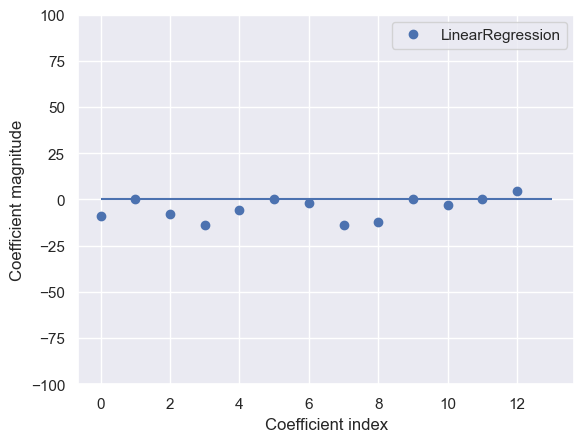

In [225]:
plt.plot(reg.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(reg.coef_))
plt.ylim(-100, 100)
plt.legend()

In [226]:
# grid.predict(X_test)
y_pred_test = reg.predict(X_test) # prediction
print(f'RMSE test: {np.around((mean_squared_error(y_test, y_pred_test,squared=False)))}') # RMSE scoe
print(f"Accuracy score (r^2): {np.around(reg.score(X_test, y_test),3)}") # r^2 score
print(f'Standard Deviation of Price: {np.around(df.age.std(),3)}') # std of age
# RMSE score is lower than std of age; Algorithm does well?

RMSE test: 13.0
Accuracy score (r^2): 0.01
Standard Deviation of Price: 13.626


In [227]:
percent_error = 100* ((y_pred_test.astype(np.int8)-y_test)/y_test)
data = {
    'predicted_age':y_pred_test.astype(np.int8),'actual_age':y_test,"percentage_error":percent_error
}
predictions_frame = pd.DataFrame(data)
predictions_frame.to_csv("predictions/bins.csv",index=True)
predictions_frame.head(5)

,predicted_age,actual_age,percentage_error
10773,39,21,85.714286
5496,34,42,-19.047619
13054,34,36,-5.555556
11825,34,29,17.241379
1326,39,53,-26.415094


In [228]:
cond = predictions_frame.percentage_error == 0
predictions_frame[cond].value_counts().sum() # only 51 values are predicted correctly

51

Text(0, 0.5, 'Actual Age')

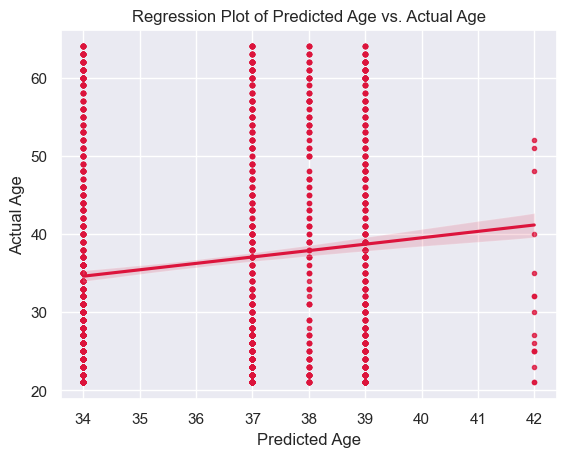

In [229]:
# Regression plot
sns.set_theme(style='darkgrid')
sns.regplot(data=predictions_frame,
        x='predicted_age',
        y='actual_age',
        fit_reg=True,
        color='crimson',
        marker='.')
plt.title('Regression Plot of Predicted Age vs. Actual Age')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')

### **Using bins with interactions (no dropping of original data)**

In [230]:
X = df.drop(columns=['age'])
y = df['age']

In [231]:
# Using bins
for col in X.columns:
    bins = np.linspace(X[col].min(),X[col].max(),2)
    bin_s = np.digitize(X[col],bins=bins)
    X[f"{col}_binned"] = bin_s
    X[f"{col}_binned"] = X[f"{col}_binned"].apply(lambda x:str(x))

In [232]:
X.columns

Index(['weight_kg', 'height_m', 'bmi', 'body_fat_percent', 'grip_force',
       'sit_ups_counts', 'sit_and_bend_forward_m', 'broad_jump_m', 'diastolic',
       'systolic', 'gender', 'encoded_class', 'clusters', 'weight_kg_binned',
       'height_m_binned', 'bmi_binned', 'body_fat_percent_binned',
       'grip_force_binned', 'sit_ups_counts_binned',
       'sit_and_bend_forward_m_binned', 'broad_jump_m_binned',
       'diastolic_binned', 'systolic_binned', 'gender_binned',
       'encoded_class_binned', 'clusters_binned'],
      dtype='object')

In [233]:
# drops = ['weight_kg', 'height_m', 'bmi', 'body_fat_percent', 'grip_force',
#        'sit_ups_counts', 'sit_and_bend_forward_m', 'broad_jump_m', 'diastolic',
#        'systolic', 'gender', 'encoded_class', 'clusters']
# X.drop(columns=drops,inplace=True)

In [234]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=.20)

In [235]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [236]:
print(reg.coef_,"\n") # Coefficients
print(reg.n_features_in_,"\n") # Number of feaetures present
print(reg.intercept_,"\n") # intercept
print(reg.feature_names_in_,"\n")# Named features

[-1.38014238e-01 -2.32158331e+01  8.48995159e-01 -2.67941241e-01
  3.13704612e-02 -6.09207724e-01  1.74271693e+00 -1.58696900e+01
  4.21510630e-02  1.23210024e-01  7.88493054e+00 -3.82406285e+00
  2.47787123e-01 -9.08272136e+00  1.37667655e-14 -2.43335504e+01
  9.95938889e+00 -8.54907712e+00  0.00000000e+00 -7.35912330e-01
  1.42522032e+01  3.64203151e-02  0.00000000e+00  7.88493054e+00
 -2.07064335e+00 -2.17566445e-01] 

26 

113.7802375051296 

['weight_kg' 'height_m' 'bmi' 'body_fat_percent' 'grip_force'
 'sit_ups_counts' 'sit_and_bend_forward_m' 'broad_jump_m' 'diastolic'
 'systolic' 'gender' 'encoded_class' 'clusters' 'weight_kg_binned'
 'height_m_binned' 'bmi_binned' 'body_fat_percent_binned'
 'grip_force_binned' 'sit_ups_counts_binned'
 'sit_and_bend_forward_m_binned' 'broad_jump_m_binned' 'diastolic_binned'
 'systolic_binned' 'gender_binned' 'encoded_class_binned'
 'clusters_binned'] 



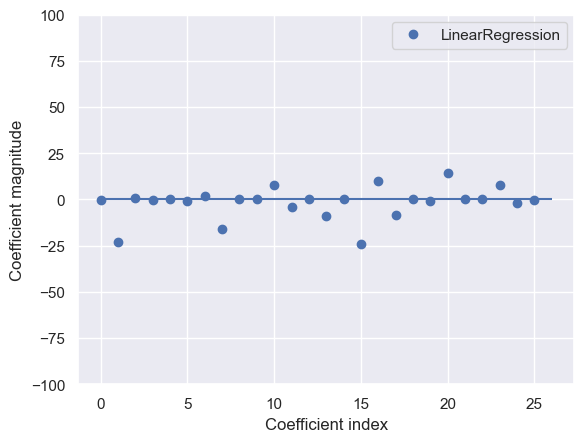

In [237]:
plt.plot(reg.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(reg.coef_))
plt.ylim(-100, 100)
plt.legend()

In [238]:
y_pred_test = reg.predict(X_test) # prediction
print(f'RMSE test: {np.around((mean_squared_error(y_test, y_pred_test,squared=False)))}') # RMSE scoe
print(f"Accuracy score (r^2): {np.around(reg.score(X_test, y_test),3)}") # r^2 score
print(f'Standard Deviation of Price: {np.around(df.age.std(),3)}') # std of age
# RMSE score is lower than std of age; Algorithm does well?

RMSE test: 9.0
Accuracy score (r^2): 0.553
Standard Deviation of Price: 13.626


In [239]:
percent_error = 100* ((y_pred_test.astype(np.int8)-y_test)/y_test)
data = {
    'predicted_age':y_pred_test.astype(np.int8),'actual_age':y_test,"percentage_error":percent_error
}
predictions_frame = pd.DataFrame(data)
predictions_frame.to_csv("predictions/bins_interactions.csv",index=True)
predictions_frame.head(5)

,predicted_age,actual_age,percentage_error
10773,45,21,114.285714
5496,41,42,-2.380952
13054,27,36,-25.000000
11825,20,29,-31.034483
1326,45,53,-15.094340


In [240]:
cond = predictions_frame.percentage_error == 0
predictions_frame[cond].value_counts().sum() # only 101 values are predicted correctly

101

Text(0, 0.5, 'Actual Age')

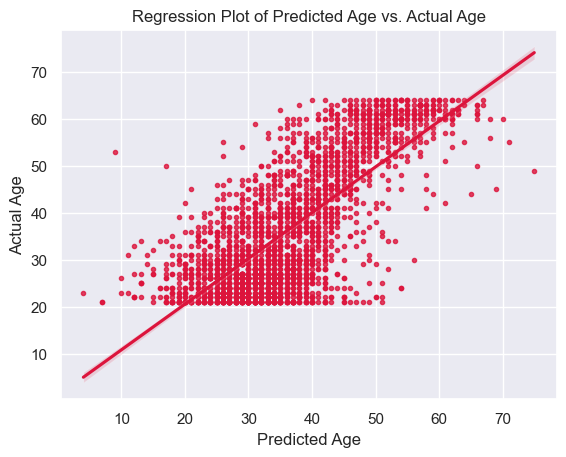

In [241]:
# Regression plot
sns.set_theme(style='darkgrid')
sns.regplot(data=predictions_frame,
        x='predicted_age',
        y='actual_age',
        fit_reg=True,
        color='crimson',
        marker='.')
plt.title('Regression Plot of Predicted Age vs. Actual Age')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')

### **Using bins with interactions (no dropping of original data)- for loop**

In [259]:
# Using bins
bin_num = [2,3,4,5,6,7,9]
for b in range(len(bin_num)):
    X = df.drop(columns=['age'])
    y = df['age']
    for col in X.columns:
        bins = np.linspace(X[col].min(),X[col].max(),bin_num[b])
        bins = np.asarray(bins, dtype='float64')
        bin_s = np.digitize(X[col],bins=bins)
        X[f"{col}_binned"] = bin_s
        X[f"{col}_binned"] = X[f"{col}_binned"].apply(lambda x:str(x))
    X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=.20)
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    print(f"Bins of {bin_num[b]}")
    y_pred_test = reg.predict(X_test) # prediction
    print(f'RMSE test: {np.around((mean_squared_error(y_test, y_pred_test,squared=False)))}') # RMSE scoe
    print(f"Accuracy score (r^2): {np.around(reg.score(X_test, y_test),3)}") # r^2 score
    print(f'Standard Deviation of Price: {np.around(df.age.std(),3)}\n') # std of age

Bins of 2
RMSE test: 9.0
Accuracy score (r^2): 0.553
Standard Deviation of Price: 13.626

Bins of 3
RMSE test: 9.0
Accuracy score (r^2): 0.56
Standard Deviation of Price: 13.626

Bins of 4
RMSE test: 9.0
Accuracy score (r^2): 0.552
Standard Deviation of Price: 13.626

Bins of 5
RMSE test: 9.0
Accuracy score (r^2): 0.555
Standard Deviation of Price: 13.626

Bins of 6
RMSE test: 9.0
Accuracy score (r^2): 0.553
Standard Deviation of Price: 13.626

Bins of 7
RMSE test: 9.0
Accuracy score (r^2): 0.551
Standard Deviation of Price: 13.626

Bins of 9
RMSE test: 9.0
Accuracy score (r^2): 0.552
Standard Deviation of Price: 13.626



### **Polynomials interactions**

In [260]:
X = df.drop(columns=['age'])
y = df['age']

In [261]:
X.columns[:-3].value_counts().sum()

10

In [262]:
X.columns[:10]

Index(['weight_kg', 'height_m', 'bmi', 'body_fat_percent', 'grip_force',
       'sit_ups_counts', 'sit_and_bend_forward_m', 'broad_jump_m', 'diastolic',
       'systolic'],
      dtype='object')

In [263]:
from sklearn.preprocessing  import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)

In [264]:
column_transformer = ColumnTransformer(
     transformers=[
        (
            'polynomials',poly,[0,1,2,3,4,5,6,7,8,9]
        )
    ], remainder='passthrough'
)

In [265]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=.20)

In [266]:
X_poly = column_transformer.fit_transform(X_train)

In [267]:
reg = LinearRegression()
reg.fit(X_poly,y_train)

LinearRegression()

In [268]:
print(reg.coef_,"\n") # Coefficients
print(reg.n_features_in_,"\n") # Number of feaetures present
print(reg.intercept_,"\n") # intercept

[-5.19171693e+01 -2.92996358e+03 -1.37647859e+02 -5.98910018e+00
  2.51426935e+00  7.88147857e+00 -2.77820413e+02 -2.54737752e+02
  2.10846854e+00  1.77505189e+00  8.38470234e-02 -3.21993813e+00
 -3.90124124e-01 -4.18174384e-02  1.84457548e-02  6.93162668e-02
 -1.52582224e+00 -1.46028827e+00  1.70099395e-02  1.00011556e-02
  9.37342460e+02  1.80934262e+02  3.47937995e+00 -1.34155253e+00
 -5.34403912e+00  1.90486330e+02  1.56457168e+02 -1.52377974e+00
 -8.59547090e-01  3.62366890e-01  1.07555561e-01 -7.27013977e-02
 -1.85196700e-01  6.03734452e+00  4.10406612e+00 -1.73616543e-02
 -4.75987044e-02 -2.22324695e-03  6.52778827e-03  1.25807293e-03
 -7.55341812e-01  8.87376328e-02 -1.00008151e-02  5.01369296e-03
  1.57879587e-03 -1.26618457e-02 -2.03163819e-01  3.19078395e-01
 -2.58383511e-03  6.43327746e-04  1.88249783e-03 -5.98484804e-01
  2.58865924e-01  3.47438823e-03 -1.19002181e-03  8.31746406e+00
 -1.48828810e+01  2.63714399e-01 -2.43846578e-01 -9.87617494e+00
 -1.18687400e-02 -5.69603

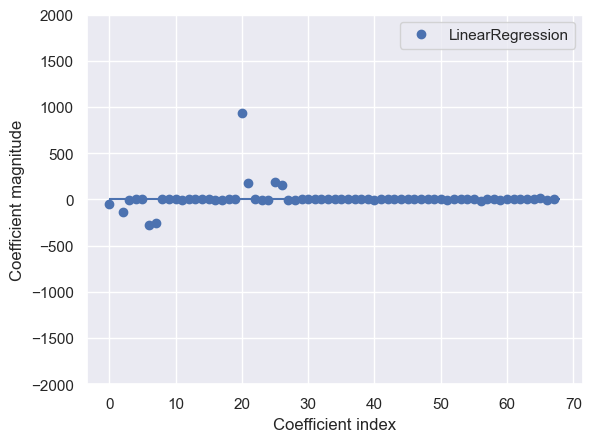

In [269]:
plt.plot(reg.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(reg.coef_))
plt.ylim(-2000, 2000)
plt.legend()

In [270]:
X_test_transform = column_transformer.transform(X_test) # Data transformation for test data
y_pred_test = reg.predict(X_test_transform) # prediction
print(f'RMSE test: {np.around((mean_squared_error(y_test, y_pred_test,squared=False)))}') # RMSE scoe
print(f"Accuracy score (r^2): {np.around(reg.score(X_test_transform, y_test),3)}") # r^2 score
print(f'Standard Deviation of Price: {np.around(df.age.std(),3)}') # std of age

RMSE test: 9.0
Accuracy score (r^2): 0.581
Standard Deviation of Price: 13.626


RMSE score is lower than std of age; Algorithm does well?

In [271]:
percent_error = 100* ((y_pred_test.astype(np.int8)-y_test)/y_test)
data = {
    'predicted_age':y_pred_test.astype(np.int8),'actual_age':y_test,"percentage_error":percent_error
}
predictions_frame = pd.DataFrame(data)
predictions_frame.to_csv("predictions/polynomials.csv",index=True)
predictions_frame.head(5)

,predicted_age,actual_age,percentage_error
10773,44,21,109.523810
5496,38,42,-9.523810
13054,29,36,-19.444444
11825,22,29,-24.137931
1326,40,53,-24.528302


In [272]:
cond = predictions_frame.percentage_error == 0
predictions_frame[cond].value_counts().sum() # only 103 values are predicted correctly

103

Text(0, 0.5, 'Actual Age')

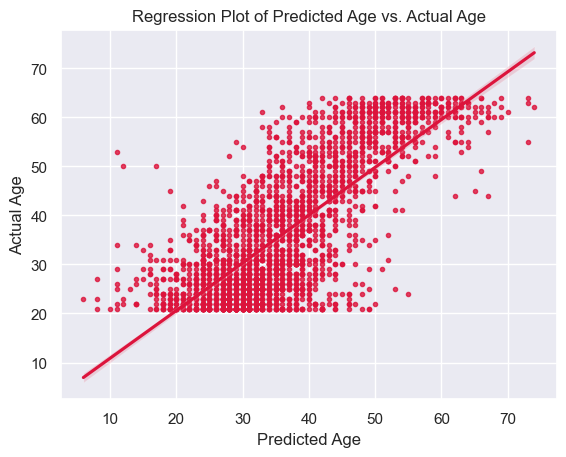

In [273]:
# Regression plot
sns.set_theme(style='darkgrid')
sns.regplot(data=predictions_frame,
        x='predicted_age',
        y='actual_age',
        fit_reg=True,
        color='crimson',
        marker='.')
plt.title('Regression Plot of Predicted Age vs. Actual Age')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')

### **Polynomials interactions-for loop**

In [274]:
X = df.drop(columns=['age'])
y = df['age']

In [275]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=.20)

In [276]:
from sklearn.preprocessing  import PolynomialFeatures
degrees = [2,3,4,5]
for d in degrees:
    # Feature engineering
    poly = PolynomialFeatures(degree=d,include_bias=False)

    column_transformer = ColumnTransformer(
     transformers=[
        (
            'polynomials',poly,[0,1,2,3,4,5,6,7,8,9]
        )
    ], remainder='passthrough'
)

    # model preparation
    X_poly = column_transformer.fit_transform(X_train)
    reg = LinearRegression()

    # Fitting
    reg.fit(X_poly,y_train)

    # Testing and inference
    X_test_transform = column_transformer.transform(X_test) # Data transformation for test data
    y_pred_test = reg.predict(X_test_transform) # prediction
    print(f"Polynomial degree of {d}")
    print(f'RMSE test: {np.around((mean_squared_error(y_test, y_pred_test,squared=False)))}') # RMSE scoe
    print(f"Accuracy score (r^2): {np.around(reg.score(X_test_transform, y_test),3)}") # r^2 score
    print(f'Standard Deviation of Price: {np.around(df.age.std(),3)}\n') # std of age

Polynomial degree of 2
RMSE test: 9.0
Accuracy score (r^2): 0.581
Standard Deviation of Price: 13.626

Polynomial degree of 3
RMSE test: 9.0
Accuracy score (r^2): 0.579
Standard Deviation of Price: 13.626

Polynomial degree of 4
RMSE test: 17.0
Accuracy score (r^2): -0.6
Standard Deviation of Price: 13.626

Polynomial degree of 5
RMSE test: 434.0
Accuracy score (r^2): -1024.922
Standard Deviation of Price: 13.626



RMSE score is lower than std of age; Algorithm does well?

### **Polynomials with scaling and log transformation**

In [277]:
X = df.drop(columns=['age'])
y = df['age']

In [278]:
def log_tranform(x):
    return np.log1p(x)

In [279]:
standard_scaler = StandardScaler() # standard_scaler 
function_transformer = FunctionTransformer(log_tranform) # functional

In [280]:
column_transformer = ColumnTransformer(
     transformers=[
        (
            'standard_scalering',standard_scaler,[0, 2, 4, 5, 8,9]
        ),
        (
            'functional_transformer',function_transformer,[3]
        )
    ], remainder='passthrough'
)

In [281]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=.20)

In [282]:
from sklearn.preprocessing  import PolynomialFeatures
degrees = [2,3,4,5]
for d in degrees:
    # Feature engineering
    poly = PolynomialFeatures(degree=d,include_bias=False)

    column_transformer = ColumnTransformer(
     transformers=[
        (
            'polynomials',poly,[0,1,2,3,4,5,6,7,8,9]
        )
    ], remainder='passthrough'
)

    # model preparation
    X_poly = column_transformer.fit_transform(X_train)
    reg = LinearRegression()

    # Fitting
    reg.fit(X_poly,y_train)

    # Testing and inference
    X_test_transform = column_transformer.transform(X_test) # Data transformation for test data
    y_pred_test = reg.predict(X_test_transform) # prediction
    print(f"Polynomial degree of {d}")
    print(f'RMSE test: {np.around((mean_squared_error(y_test, y_pred_test,squared=False)))}') # RMSE scoe
    print(f"Accuracy score (r^2): {np.around(reg.score(X_test_transform, y_test),3)}") # r^2 score
    print(f'Standard Deviation of Price: {np.around(df.age.std(),3)}\n') # std of age

Polynomial degree of 2
RMSE test: 9.0
Accuracy score (r^2): 0.581
Standard Deviation of Price: 13.626

Polynomial degree of 3
RMSE test: 9.0
Accuracy score (r^2): 0.579
Standard Deviation of Price: 13.626

Polynomial degree of 4
RMSE test: 17.0
Accuracy score (r^2): -0.6
Standard Deviation of Price: 13.626

Polynomial degree of 5
RMSE test: 434.0
Accuracy score (r^2): -1024.922
Standard Deviation of Price: 13.626



- So the combination of log, scaling and polynomials isn't much useful in this data set.

**When using a transformation**
- Splitting the data
- fit_transform on X_train 
- Apply model by calling model.fit(X_train_transform,y_train)
- transform on X_test
- Apply model by calling model.predict(X_test_transform)

*If maybe function is made, you could find a way to make use of a FunctionTransformer or some other approach to create Pipeline to addressing data leakage.*